# Importing and Wrangling APPL stock dataset

In [1313]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") # this will take away the red dialog boxes in the output terminal

# Reading The Data With 'Date' Column Indexed In DateTimes

In [1314]:
Data = pd.read_csv('aapl.csv', index_col = 'Date', parse_dates=True) # parse_dates = True will convert the indexed 'Date' column to datetimes types.
Data = Data.sort_index()
Data.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-24,131.32,133.46,131.10,131.97,"54,930,059"
2020-12-28,133.99,137.34,133.51,136.69,"124,486,203"
2020-12-29,138.05,138.79,134.34,134.87,"121,047,297"
2020-12-30,135.58,135.99,133.40,133.72,"96,452,117"
2020-12-31,134.08,134.74,131.72,132.69,"99,116,594"


In [1315]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 150 entries, 2020-06-01 to 2020-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    150 non-null    float64
 1   High    150 non-null    float64
 2   Low     150 non-null    float64
 3   Close   150 non-null    float64
 4   Volume  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [1316]:
new_5 = []
for i in Data['Volume']: # Need to get rid of the commas
    new_x = ''
    for j in i:
        if j != ',':
            new_x += j
        else:
            continue
    new_5.append(float(new_x))
new_5[:5]

[81018600.0, 87642796.0, 104491204.0, 87560360.0, 137250204.0]

In [1317]:
Data['Volume'] = new_5
Data.head() # This data is all of float type with the Data being datetime64[ns] type.  This can be used for modelling.

,Open,High,Low,Close,Volume
Date,,,,,
2020-06-01,79.44,80.59,79.30,80.46,81018600.0
2020-06-02,80.19,80.86,79.73,80.84,87642796.0
2020-06-03,81.17,81.55,80.58,81.28,104491204.0
2020-06-04,81.10,81.41,80.20,80.58,87560360.0
2020-06-05,80.84,82.94,80.81,82.88,137250204.0


# Wrangling The Data

In [1318]:
# Data['Date'] = pd.to_datetime(Data['Date']) # Instead of doing this, I can just pd.read_csv('csv file', index_col = 'Date', parse_dates = True)
                                            # parse_dates = True will convert into datetime indexes.

### Removal Of '$' character from the dataframe values

In [1319]:
#new_1 = [] # I got rid of the $ this way.  Can't just use replace for some reason.
#new_2 = []
#new_3 = []
#new_4 = []
#for i in Data['Open']:
#    new_1.append(i[1:])
#    del i
#Data['Open'] = new_1

#for i in Data['High']:
#    new_2.append(i[1:])
#Data['High'] = new_2
#for i in Data['Low']:
#    new_3.append(i[1:])
#Data['Low'] = new_3
#for i in Data['Close']:
#    new_4.append(i[1:])
#Data['Close'] = new_4

#Data.head()

### Forcing The DataFrame Value Into Floats

In [1320]:
Data['Open'] = Data['Open'].astype("float64")
Data['High'] = Data['High'].astype("float64")
Data['Low'] = Data['Low'].astype("float64")
Data['Close'] = Data['Close'].astype("float64")

### Removal Of Commas In Volume Entries

In [1321]:
Data['Volume'] = new_5
Data.head() # This data is all of float type with the Data being datetime64[ns] type.  This can be used for modelling.

,Open,High,Low,Close,Volume
Date,,,,,
2020-06-01,79.44,80.59,79.30,80.46,81018600.0
2020-06-02,80.19,80.86,79.73,80.84,87642796.0
2020-06-03,81.17,81.55,80.58,81.28,104491204.0
2020-06-04,81.10,81.41,80.20,80.58,87560360.0
2020-06-05,80.84,82.94,80.81,82.88,137250204.0


In [1322]:
Extracted_Data = Data.drop(['High', 'Low', 'Close', 'Volume'], axis=1)
Extracted_Data = Extracted_Data.sort_index()
Extracted_Data.head()

,Open
Date,
2020-06-01,79.44
2020-06-02,80.19
2020-06-03,81.17
2020-06-04,81.10
2020-06-05,80.84


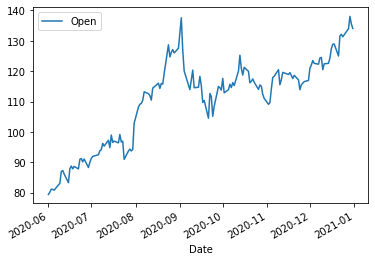

In [1323]:
# This is how you make a basic plot with Extracted_Data As timeseries to be plotted.

fig, ax = plt.subplots() # Creating the axis
Extracted_Data.plot(ax=ax)
plt.show()

### Extracted_Data Variable Is The Input TimeSeries To Be Modelled

### Splitting Up Train/Test Data (Optional)

In [1324]:
test = Extracted_Data.loc['Dec 1, 2020':].sort_index() # this doesnt work because data is backwards.  Need to reverse order of dates so that 1st entry is earliest one.
train = Extracted_Data.loc[:'Dec 1, 2020'].sort_index() # used .sort_index() so that the data arranged in chronological order.

The train data STARTS from THIRD WEEK OF MAY to DEC 31, 2020. The test data STARTS from Jan 1, 2021 (Jan 4, 2021 earliest) to FEB 5, 2021.

### Plotting train/test data

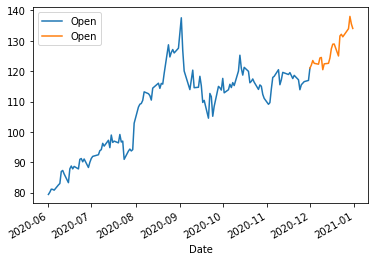

In [1325]:
fig, ax = plt.subplots()
train.plot(ax=ax)
test.plot(ax=ax)
plt.show()

### Stationarity - Data Preparation
The timeseries data needs to be stationary before it can be modelled.  By stationary:
1. No trend
2. Variance is constant
3. Autocorrelation is constant

## The Dickey-Fuller Test For Stationarity

In [1326]:
from statsmodels.tsa.stattools import adfuller
results = adfuller(Extracted_Data)

In [1327]:
print(results)

(-1.6999213870271157, 0.43115298109269695, 0, 149, {'1%': -3.4750180242954167, '5%': -2.8811408028842043, '10%': -2.577221358046935}, 693.6264566993541)


0th element above is the adf statistic or test statistic.  The more negative this number is, the more likely the data is stationary.  The 1st element is the p-value.  If p-value is below 0.05, then null hypothesis (the data is not stationary) is rejected.

### Making The Data Stationary

#### Taking the difference

In [1328]:
Extracted_Data_Stationary_diff = Extracted_Data.diff().dropna() # Use dropna to get rid of first NaN value

Try taking the difference with Extracted_Data.diff().diff()   Taking the second difference for instance.  This should be the first thing to try. The .dropna() should be chained with it there will be missing values in the first entry/ies.

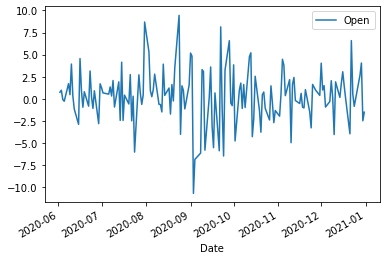

In [1329]:
fig, ax = plt.subplots()
Extracted_Data_Stationary_diff.plot(ax=ax)
plt.show()

#### Taking The Second Order Difference

In [1330]:
Extracted_Data_Stationary_diff2 = Extracted_Data.diff().diff().dropna() # Use dropna to get rid of first NaN value

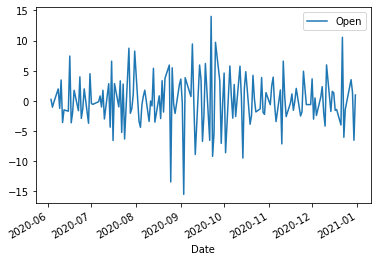

In [1331]:
fig, ax = plt.subplots()
Extracted_Data_Stationary_diff2.plot(ax=ax)
plt.show()

#### Take The Third Order Difference

In [1332]:
Extracted_Data_Stationary_diff3 = Extracted_Data.diff().diff().diff().dropna()

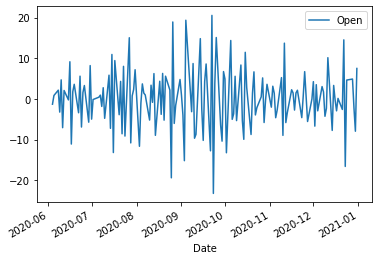

In [1333]:
fig, ax = plt.subplots()
Extracted_Data_Stationary_diff3.plot(ax=ax)
plt.show()

#### Take the log

In [1334]:
Stationary_Extracted_Data_log = np.log(Extracted_Data).dropna()

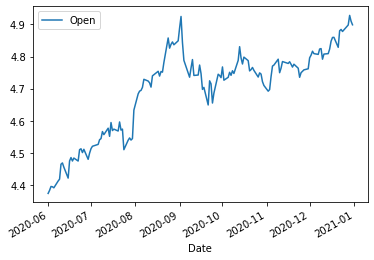

In [1335]:
fig, ax = plt.subplots() # How do you make the below sequence stationary the best so far was to take log10
Stationary_Extracted_Data_log.plot(ax=ax)
plt.show()

#### Take the square root

In [1336]:
Stationary_Extracted_Data_sqrt = np.sqrt(Extracted_Data).dropna()

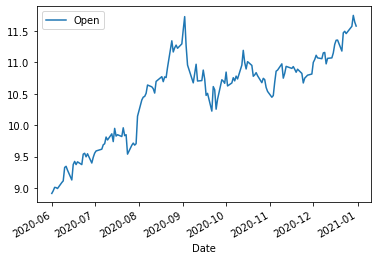

In [1337]:
fig, ax = plt.subplots()
Stationary_Extracted_Data_sqrt.plot(ax=ax)
plt.show()

#### Take the proportional change

In [1338]:
Stationary_Extracted_Data_propchange = (Extracted_Data.shift(1)/Extracted_Data).dropna()

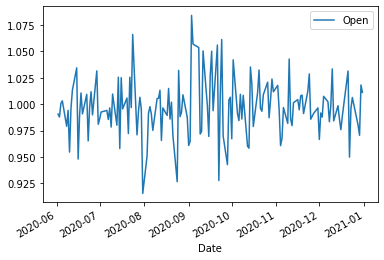

In [1339]:
fig, ax = plt.subplots()
Stationary_Extracted_Data_propchange.plot(ax=ax)
plt.show()

#### Take the log return

In [1340]:
Stationary_Extracted_Data_log_return = np.log(Extracted_Data/Extracted_Data.shift(1)).dropna()
# log(yt) = log(yt/yt-1) substituting as follows
# yt = Extracted_Data
# yt - 1 = Extracted_Data.shift(1)
# log = np.log()

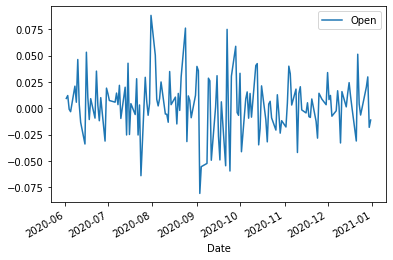

In [1341]:
fig, ax = plt.subplots()
Stationary_Extracted_Data_log_return.plot(ax=ax) # This transformation appears to be the best one here.
plt.show()

In [1342]:
Stationary_Models = [Extracted_Data, Extracted_Data_Stationary_diff, Extracted_Data_Stationary_diff2, Extracted_Data_Stationary_diff3, Stationary_Extracted_Data_log, Stationary_Extracted_Data_sqrt, Stationary_Extracted_Data_propchange, Stationary_Extracted_Data_log_return]
adf = []
p_values = []
for i in Stationary_Models:
    results = adfuller(i)
    adf.append(results[0])
    p_values.append(results[1]) # Be sure to adjust the index and the stationary models list to what ever model you're working with.
ADF_Results_All_Models = pd.DataFrame((zip(adf, p_values)), columns = ['adf-test score', 'p-value'], index=['Extracted_Data', 'First Order Difference','Second Order Difference', 'Third Order Difference', 'Logarithmic Order', 'Square Root', 'Proportional Change', 'Log Return'])
ADF_Results_All_Models

,adf-test score,p-value
Extracted_Data,-1.699921,4.311530e-01
First Order Difference,-10.477014,1.241477e-18
Second Order Difference,-7.834394,6.170413e-12
Third Order Difference,-6.908572,1.229048e-09
Logarithmic Order,-1.930582,3.178138e-01
Square Root,-1.806680,3.771503e-01
Proportional Change,-10.282143,3.755385e-18
Log Return,-10.336174,2.760219e-18


From the Dickey-Fuller Test, the origional data is definitely not stationary and neither are the datasets from a base logarithmic, and square root transformations (p>0.05).  The transformations that passed the Dickey-Fuller test here are the first order difference, proportional change and the log return (p<0.05).  Because p is very small in these cases, the null hypothesis (the data is not stationary) is rejected.  According to the adf test scores, the proportional change was the most negative number that therefore indicates this transformation as the most stationary data in addition to the fact that the p-value is the smallest here.

For simplicity, we'll choose to take the second order difference since this is the only transform function applicable to the built in transform functions for SARIMAX.

# ARMA Models

### How to Randomly Generate Data Using arma_generate_sample

In [1343]:
#from statsmodels.tsa.arima_process import arma_generate_sample
# For an ARMA(1, 1) model, the data can be projected as follows:
#ar_coefs = [1, -0.5] # the ARMA(1,1) model has the equation; y(t) = -0.5y(t-1) + 0.2(et-1) + e(t) where e(t) is the shock term.
#ma_coefs = [1, 0.2]
#y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, sigma=0.5) # returns a numpy array of 100 datapoints specified as such.

In [1344]:
#y = pd.DataFrame(y)

#fig, ax = plt.subplots()
#y.plot(ax=ax)
#plt.show()

### Fitting The arma model above

In [1345]:
#from statsmodels.tsa.arima_model import ARMA
#model = ARMA(y, order = (1, 1)) # Instantiate ARMA model where here p and q both equal 1
#results = model.fit() # fit the model
#predictions = pd.DataFrame(model.predict(y)) # Out of curiosity, a prediction was made for the next 100 datapoints calling this.
#fig, ax = plt.subplots()
#predictions.plot(ax=ax)
#plt.show()

In [1346]:
#print(results.summary())

### Creating ARMAX Models: The exogenous variable

In [1347]:
# model = ARMA(y, order = (p, q), exog=df['exogenous_column'])
# results = model.fit() # fit the model

# How To Watch Your P's And Q's In ARIMA Models: Intro to ACF and PACF (autocorrelation function and partial autocorrelation function)

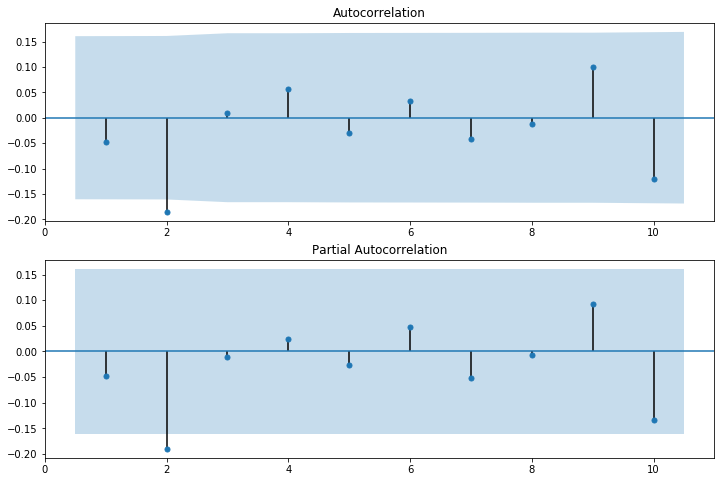

In [1348]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Note: the data MUST be stationary before plotting the acf and pacf functions.
# The lags are of any option depending on how many lags you want to see. 

# Create Figure
#fig (ax1, ax2) = plt.subplots(2, 1, figsize = (8, 8))
#plot_acf(timeseries_dataframe, lags=10, zero=False, ax=ax1)
#plot_pacf(timeseries_dataframe, lags=10, zero=False, ax=ax2)

# Here's an example:

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

#Plot ACF and PACF
plot_acf(Extracted_Data_Stationary_diff, lags=10, zero=False, ax=ax1)
plot_pacf(Extracted_Data_Stationary_diff, lags=10, zero=False, ax=ax2)

# Show plot
plt.show()

# If data is not stationary, the autocorrelation datapoints will be very high and tail off very slowly
# If order of difference in the data is too high, the autocorrelation point at 1st lag point (along x-axis) will be very negative.

# To determine your p and q value - refer to table on acf and pacf cutoff/tail off rules.

# Case 1: If Autocorrelation tails off with increasing lag and partial autocorrelation cuts off at lag p then this is an ar(p) model.
# Case 2: If Autocorrelation cuts off at lag q and the amplitude of partial autocorrelation tails off with increasing lag, then it's an ma(q) model.
# Case 3: If both tail off, then it's an arma(p, q) model.
# Case 4: If Autocorrelation tails off very slowly and the partial autocorrelation cuts off, then data is not stationary.
# Case 5: If Autocorrelation and partial autocorrelation coefficients are within blue (statistical insignificant) region, p and q high values.

# Using AIC/BIC Metrics To determine best ARIMA model

In [1349]:
# The lower the value, the better the model.  AIC good at prediction, BIC good at explanation.

#order_aic_bic = []
# Looping over AR order:
#for p in range(10):
# Looping over MA order
#   for q in range(10):
#    try:
#        model = SARIMAX(Extracted_Data, order = (p, 1, q))
#        results = model.fit()
#        order_aic_bic.append((p, q, results.aic, results.bic))
#    except:
#        print(p, q, None, None)  # These are for bad models that will throw a ValueError if bad p and q values used to fit model.
#Order_df = pd.DataFrame(order_aic_bic, columns = ['p', 'q', 'aic', 'bic'])   # turning the results into dataframe

#print(Order_df.sort_values('aic')) # predictability
#print(Order_df.sort_values('bic')) # explainability

# Model Defined Here

In [1350]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train, order=(20, 1, 16), trend='c')
results_model = model.fit()

In [1351]:
print(results_model.summary())

                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                  129
Model:             SARIMAX(20, 1, 16)   Log Likelihood                -311.859
Date:                Mon, 01 Mar 2021   AIC                            699.718
Time:                        22:26:27   BIC                            808.095
Sample:                             0   HQIC                           743.752
                                - 129                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3045      1.065      0.286      0.775      -1.783       2.392
ar.L1         -0.4317      0.750     -0.576      0.565      -1.901       1.037
ar.L2         -0.3386      0.735     -0.461      0.6

# Using Residuals To Diagnose The Quality Of An ARMA(p, q) model

Mean Absolute Error 2.6340846317161204


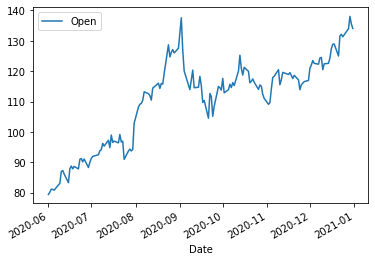

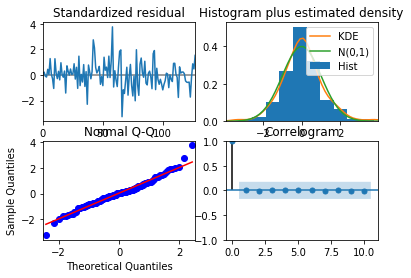

In [1352]:
# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(results_model.resid))

# Print mean absolute error
print('Mean Absolute Error {}'.format(mae))

# Make plot of time series for comparison
Extracted_Data.plot()
plt.show()

# Can also use plot_diagnostics to check the quality of the model:

# Create the 4 diagostics plots
results_model.plot_diagnostics()
plt.show()

This should be my checkpoint as to whether or not the appropriate p and q values are selected here.  If there are problems, go back to redefining the model.

# Predictions

### One Step Ahead Predictions

In [1353]:
forecast_one_step_ahead= results_model.get_prediction(start=-25)
mean_forecast_one_step_ahead = forecast_one_step_ahead.predicted_mean
mean_forecast_one_step_ahead = pd.DataFrame(mean_forecast_one_step_ahead, columns = ['mean_forecast'])
mean_forecast_one_step_ahead.tail()

,mean_forecast
Date,
2020-11-24,118.520689
2020-11-25,116.006389
2020-11-27,114.240660
2020-11-30,115.709221
2020-12-01,116.922541


In [1354]:
confidence_intervals=forecast_one_step_ahead.conf_int()
lower = confidence_intervals.loc[:, 'lower Open']
upper = confidence_intervals.loc[:, 'upper Open']
confidence_intervals.head()

,lower Open,upper Open
Date,,
2020-10-27,109.851508,120.375299
2020-10-28,109.570828,120.093958
2020-10-29,109.755132,120.278255
2020-10-30,105.771047,116.287763
2020-11-02,104.744849,115.260621


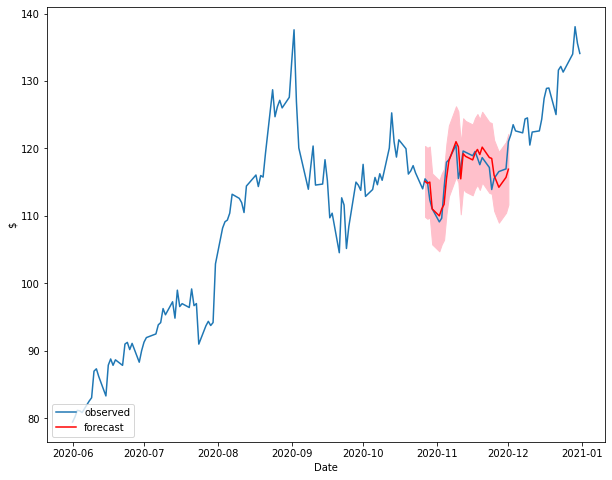

In [1355]:
plt.figure(figsize=(10, 8))
plt.plot(Extracted_Data.index, Extracted_Data['Open'], label='observed')
plt.plot(mean_forecast_one_step_ahead.index, mean_forecast_one_step_ahead, color='r', label = 'forecast')
plt.fill_between(lower.index, upper, lower, color='pink')
plt.xlabel('Date')
plt.ylabel('$')
plt.legend(loc='lower left')
plt.show()

### Making Dynamic Predictions - Just Change Dynamic Kwarg

In [1356]:
forecast_dynamic= results_model.get_prediction(start=-25, dynamic=True)

In [1357]:
mean_forecast_dynamic = forecast_dynamic.predicted_mean
mean_forecast_dynamic = pd.DataFrame(mean_forecast_dynamic, columns = ['mean_forecast'])
mean_forecast_dynamic.head()

,mean_forecast
Date,
2020-10-27,115.113403
2020-10-28,114.478160
2020-10-29,114.504931
2020-10-30,113.055192
2020-11-02,111.653249


In [1358]:
confidence_intervals=forecast_dynamic.conf_int()
lower_dynamic = confidence_intervals.loc[:, 'lower Open']
upper_dynamic = confidence_intervals.loc[:, 'upper Open']
confidence_intervals.tail()

,lower Open,upper Open
Date,,
2020-11-24,105.306724,141.789518
2020-11-25,106.404356,143.377305
2020-11-27,104.888867,142.337949
2020-11-30,104.004764,141.958692
2020-12-01,104.822619,143.150954


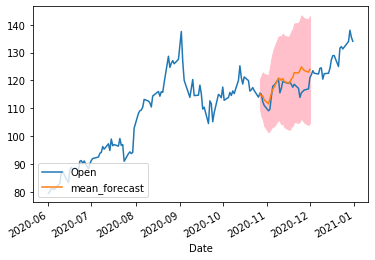

In [1359]:
fig, ax = plt.subplots()
Extracted_Data.plot(ax=ax)
mean_forecast_dynamic.plot(ax=ax)
plt.fill_between(mean_forecast_dynamic.index, lower_dynamic, upper_dynamic, color='pink')
plt.legend(loc="lower left")
plt.show()

### Now To Predict The Future - Forecasting

In [1360]:
forecast_future= results_model.get_forecast(steps=30)

In [1361]:
mean_forecast_future = forecast_future.predicted_mean
mean_forecast_future = pd.DataFrame(mean_forecast_future, columns = ['mean_forecast'])
mean_forecast_future.head()

,mean_forecast
129,121.680449
130,121.440830
131,123.143576
132,124.513243
133,126.172488


In [1362]:
confidence_intervals_forecast = forecast_future.conf_int()
lower_forecast = confidence_intervals_forecast.loc[:, 'lower Open']
upper_forecast = confidence_intervals_forecast.loc[:, 'upper Open']
confidence_intervals.tail()

,lower Open,upper Open
Date,,
2020-11-24,105.306724,141.789518
2020-11-25,106.404356,143.377305
2020-11-27,104.888867,142.337949
2020-11-30,104.004764,141.958692
2020-12-01,104.822619,143.150954


In [1363]:
len(confidence_intervals)

25

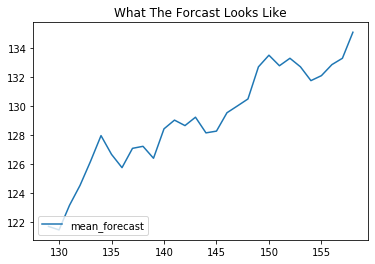

In [1364]:
fig, ax = plt.subplots()
mean_forecast_future.plot(ax=ax)
plt.title("What The Forcast Looks Like")
plt.legend(loc="lower left")
plt.show()

### Applying numpy.cumsum to get an absolute value forecast

In [1365]:
#from numpy import cumsum
#from statsmodels.tsa.arima_model import ARMA
#model_diff = ARMA(Extracted_Data, order = (0, 1), exog = Data['Volume']) # Instantiate ARMA model - need to feed in the correct data
#results_diff = model_diff.fit() # fit the model
#model_diff_forecast_pred_mean = results_model_diff.get_forecast(steps=10).predicted_mean
#Int_Forecast = np.cumsum(model_diff_forecast_pred_mean)
#Value_Forecast = Int_Forecast + Extracted_Data.iloc[-1, 0]
#Value_Forecast # Ideally, this should be the same thing as predicting the differential model.

### Creating a series of datetimes to be used as an index to the forecast

In [1366]:
dates = np.arange('2020-12-01', '2020-12-31', dtype='datetime64[D]') # 25 Days as specified by prediction
len(dates)

30

### Plotting a combination of observed, prediction and forecast for 25 days

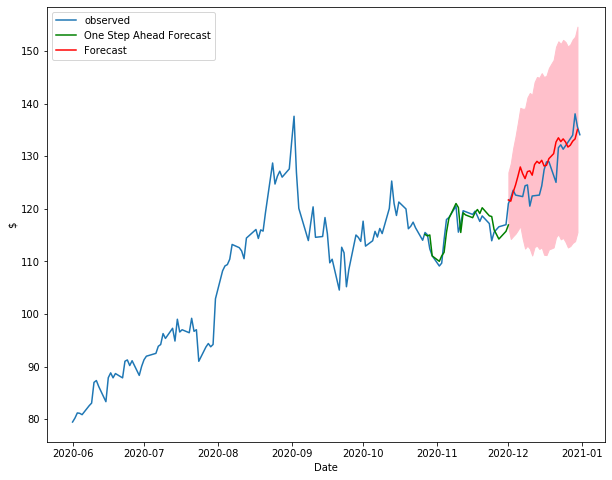

In [1367]:
plt.figure(figsize=(10, 8))
plt.plot(Extracted_Data.index, Extracted_Data['Open'], label='observed')
plt.plot(mean_forecast_one_step_ahead.index, mean_forecast_one_step_ahead, color='green', label = 'One Step Ahead Forecast')
plt.plot(dates, mean_forecast_future, color='r', label = 'Forecast')
plt.fill_between(dates, upper_forecast, lower_forecast, color='pink')
plt.xlabel('Date')
plt.ylabel('$')
plt.legend(loc='upper left')
plt.savefig('NUMI Forecast')
plt.show() 

In [1368]:
mean_forecast_future.index = dates
mean_forecast_future

,mean_forecast
2020-12-01,121.680449
2020-12-02,121.440830
2020-12-03,123.143576
2020-12-04,124.513243
2020-12-05,126.172488
2020-12-06,127.946638
2020-12-07,126.653521
2020-12-08,125.736590
2020-12-09,127.069894
2020-12-10,127.208415


In [1369]:
test

,Open
Date,
2020-12-01,121.01
2020-12-02,122.02
2020-12-03,123.52
2020-12-04,122.60
2020-12-07,122.31
2020-12-08,124.37
2020-12-09,124.53
2020-12-10,120.50
2020-12-11,122.43


In [1370]:
mean_forecast_future_without_index = list(mean_forecast_future['mean_forecast'].values)

### Massaging The Forecast Data And Test Data 

In [1371]:
Massaged_test = list(test['Open'])
Massaged_Forecast = [145.32]
index = 0
for i in test.index:
    for j in mean_forecast_future.index:
        if i == j:
            Massaged_Forecast.append(mean_forecast_future_without_index[index])
            index = index + 1

In [1372]:
len(Massaged_Forecast)

22

In [1373]:
Massaged_Test = np.array(Massaged_test)
Massaged_Forecast = np.array(Massaged_Forecast)

In [1374]:
array_of_absolute_differences = abs((Massaged_Forecast - Massaged_test)/Massaged_test)
array_of_absolute_differences

array([0.20089249, 0.00278275, 0.01683266, 0.00443374, 0.0180136 ,
       0.01449295, 0.02743626, 0.05106656, 0.027008  , 0.03645917,
       0.02306912, 0.00804955, 0.00376818, 0.00043838, 0.02894015,
       0.01818392, 0.0304486 , 0.02332218, 0.03332476, 0.05833715,
       0.03764433, 0.01034924])

In [1375]:
Relative_Error = sum(array_of_absolute_differences)

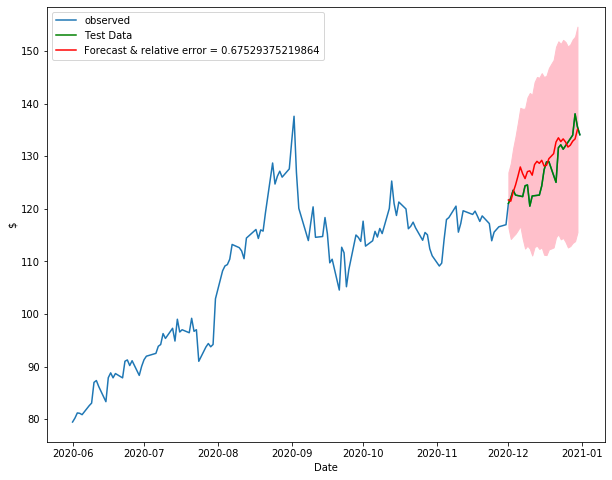

In [1376]:
plt.figure(figsize=(10, 8))
plt.plot(Extracted_Data.index, Extracted_Data['Open'], label='observed')
plt.plot(test.index, test, color='green', label = 'Test Data')
plt.plot(dates, mean_forecast_future, color='r', label = 'Forecast & relative error = {}'.format(Relative_Error))
plt.fill_between(dates, upper_forecast, lower_forecast, color='pink')
plt.xlabel('Date')
plt.ylabel('$')
plt.legend(loc='upper left')
plt.savefig('aapl4t')
plt.show()

In [1377]:
# To fit a ARIMA MODEL...
# from statsmodels.tsa.arima_model import ARMA
# model = ARMA(timeseries, order = (p, q)) where p and q represent the order of the ra and ma respectively.
# timeseries can either be: Pandas DataFrame, Pandas Series or Numpy Array.  Note that this is training data.

# To fit an ar model: set q = 0 such that:
# ar_model = ARMA(timeseries, order = (p, 0))

# To fit an ma model: set p = 0 such that:
# ma_model = ARMA(timeseries, order = (0, q))

In [1378]:
# To fit an ARMAX MODEL:
# use an exogenous array or column as extra information to predict the ARIMA Model.
# model = ARMA(timeseries, order = (p, q), exog = df['some_other_column'])
# I have the idea of making my exogenous variable the trade volume.

# Forecasting with the created ARMA or ARMAX Models

In [1379]:
# y = a1y(t-1) + e(t)
# next value, y is the product of the previous datapoint * a1 constant (in this case L1 constant for an ARMA model)
# The uncertainty of y(t) is the standard deviation of the shock term; e(t)

## SARIMAX Models

In [1380]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# model = SARIMAX(df, order = (p, 0, q), trend = 'c') - this is the same as an ARMA(p, q) model.  Trend = 'c' is a must if origin not 0.
# results = model.fit()
# forecast = results.get_prediction(start=-25) # one step ahead prediction from -25 datapoints from present.  -- Note: add kwarg dynamic=True to make dynamic predictions.
# mean_forecast = forecast.predicted_mean  -- This is the central forcasted value.
# The predicted mean is a pandas series with future index and the mean_forecast datapoints.  Note that index needs to be converted to future datetimes.
# confidence_intervals = forecast.conf_int()  -- Returns a Pandas DataFrame with 2 columns; lower_y and upper_y indexed by datetimes.
# plt.fill_between(dates, conf_int.iloc[:,0], conf_int.iloc[:,1], alpha=0.2)

## Plot Predictions

In [1381]:
# plt.figure()
# plt.plot(dates (just put df.index if datetime series/ mean_forecast.index as an example), mean_forecast.values (or just mean_forecast), color='red', label = 'forecast')
# plt.fill_between(dates, lower_limits, upper_limits, color = 'pink')
# plt.show()

# Here's an example from the amazon stock:

# plot the amazon data
#plt.plot(amazon.index, amazon, label='observed')

# plot your mean forecast
#plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
#plt.fill_inbetween(mean_forecast.index, upper_limits, lower_limits, color='pink')

# set labels, legends and show plot
#plt.xlabel('Date')
#plt.ylabel('Amazon Stock Price - Close USD')
#plt.legend()
#plt.show()

# Additional notes on absolute value forecasts and presentation of dickey-fuller test

In [1382]:
# If a stock is not stationary like mine (it has a growth trend), need to transform data
# Take the first order difference and then plot it to see if it's stationary; timeseries_data.diff()

# diff_forecast = results.get_forecast(steps=10).predicted_mean

# To get the absolute difference - instead of the difference:
# from numpy import cumsum
# mean_forecast = cumsum(diff_forecast) + df.iloc[-1, 0]  Add the last datapoint.

# For Example:

# Make arma forecast of next 10 differences
#arma_diff_forecast = arma_results.get_forecast(steps=10).predicted_mean

# Integrate the difference forecast
#arma_int_forecast = np.cumsum(arma_diff_forecast)

# Make absolute value forecast
#arma_value_forecast = arma_int_forecast + amazon.iloc[-1, 0]

# Print forecast
# print(arma_value_forecast)


# The ARIMA model comes from the SARIMAX model; p = number or autoregressive lags, d = order or differencing, q = number of ma lags.
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# model = SARIMAX(df, order = (p, d, q), trend = 'c') - this is the same as an ARMA(p, q) model if d=0.  Trend = 'c' is a must if origin not 0.

# For Example

# This takes in non-stationary data, takes the first order difference, then models that.
# Note - the value of d depends on the dicky fuller adfuller() test.  adf value is highly negative and p-value is almost 0. 
# Pick the first stationary dataset.

# model = SARIMAX(df, order = (2, 1, 1))
# results = model.fit()
# mean_forecast = results.get_forecast(steps=10).predicted_mean

# To make a forecast:
# mean_forecast = results.get_forecast(steps=steps).predicted_mean

# To decide the value of d in the ARIMA model, perform a dickey-fuller test.
# adf = adfuller(df.iloc[:,0])
# To print the adf statistic and p-value,
# print('ADF Statistic:' adf[0])
# print('p-value:' adf[1])

## Decomposing The Timeseries Into 4 Components; seasonal, trend, residual, observed

In [1383]:
#from statsmodels.tsa.seasonal import seasonal_decompose
#decomp = seasonal_decompose(TIMESERIES, freq=SUSPECTED PEROID NUMBER IN UNITS OF X-AXIS)
#decomp.plot()
#plt.show() # will automatically plot time series into 4 components

In [1384]:
# Create figure and subplot
# fig, ax1 = plt.subplots()

# Plot the ACF on ax1
# plot_acf(water['water_consumers'], lags=25, zero=False,  ax=ax1)

# Show figure
# plt.show()

In [1385]:
# Subtract the rolling mean -- 15 steps
# water_2 = water - water.rolling(15).mean()

# Drop the NaN values
# water_2 = water_2.dropna()

# Create figure and subplots
# fig, ax1 = plt.subplots()

# Plot the ACF
# plot_acf(water_2['water_consumers'], lags=25, zero=False, ax=ax1)

# Show figure
# plt.show()